# Loading and preprocesing

Importing libraries

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import keras
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras_preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet

In [86]:
root_dir="/content/drive/MyDrive/Thesis resources/Datasets/dataset'/Mini_DDSM_Upload"
number_of_images={}
for dir in os.listdir(root_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(root_dir,dir)))

Creating Traning Folder

In [87]:

def dataFolder(p,split):
  if not os.path.exists("/content/drive/MyDrive/"+p):
    os.mkdir("/content/drive/MyDrive/"+p)
    for dir in os.listdir(root_dir):
      os.makedirs("/content/drive/MyDrive/"+p+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(root_dir,dir)),size=(math.floor(split*number_of_images[dir])-5),replace=False):
        O=os.path.join(root_dir,dir,img)
        D=os.path.join("/content/drive/MyDrive/"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{p} Folder exist")

In [88]:
dataFolder("thesis_train",0.7)
dataFolder("thesis_test",0.15)
dataFolder("thesis_val",0.15)

thesis_train Folder exist
thesis_test Folder exist
thesis_val Folder exist


In [89]:
root_dir="/content/drive/MyDrive/Thesis resources/Datasets/dataset'/Mini_DDSM_Upload"
number_of_images={}
for dir in os.listdir(root_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(root_dir,dir)))
number_of_images.items()

dict_items([('Normal', 16), ('Cancer', 16), ('Benign', 16)])

# Basic CNN model

In [90]:
#CNN Model
model= Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3), activation= 'relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)      

In [91]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [92]:
def preprocessingImages1(path):
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image= image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode= 'binary')

  return image 

In [93]:
path="/content/drive/MyDrive/thesis_train"
train_data= preprocessingImages1(path)

Found 6772 images belonging to 3 classes.


In [94]:
def preprocessingImages2(path):
  image_data=ImageDataGenerator(rescale=1/255)
  image= image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode= 'binary')

  return image 

In [95]:
path="/content/drive/MyDrive/thesis_test"
test_data= preprocessingImages2(path)

Found 1439 images belonging to 3 classes.


In [96]:
path="/content/drive/MyDrive/thesis_val"
val_data= preprocessingImages2(path)

Found 1439 images belonging to 3 classes.


In [97]:
# early stopping and model check point
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early stopping
es=EarlyStopping (monitor="val_accuracy",min_delta=0.01, patience=6, verbose=1, mode='auto')

#model check point
mc= ModelCheckpoint(monitor="val_accuracy",filepath="/content/drive/MyDrive/Thesis work/bmodel.h5",verbose=1, save_best_only=True, mode='auto')
cd=[es,mc]


Model traning

In [98]:
# model Training
hs=model.fit_generator(generator=train_data, steps_per_epoch=8, epochs=30, verbose=1, validation_data=val_data, validation_steps=16, callbacks=cd )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.5696 - accuracy: 0.3906
Epoch 1: val_accuracy improved from -inf to 0.36719, saving model to /content/drive/MyDrive/Thesis work/bmodel.h5
8/8 [==============================] - 44s 6s/step - loss: 0.5696 - accuracy: 0.3906 - val_loss: 0.0168 - val_accuracy: 0.3672
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.1940 - accuracy: 0.3906
Epoch 2: val_accuracy improved from 0.36719 to 0.37109, saving model to /content/drive/MyDrive/Thesis work/bmodel.h5
8/8 [==============================] - 43s 6s/step - loss: 0.1940 - accuracy: 0.3906 - val_loss: 0.0291 - val_accuracy: 0.3711
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.1440 - accuracy: 0.4180 
Epoch 3: val_accuracy did not improve from 0.37109
8/8 [==============================] - 42s 5s/step - loss: 0.1440 - accuracy: 0.4180 - val_loss: -0.1652 - val_accuracy: 0.3457
Epoch 4/30
8/8 [==============================] - ETA: 0s -

In [99]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

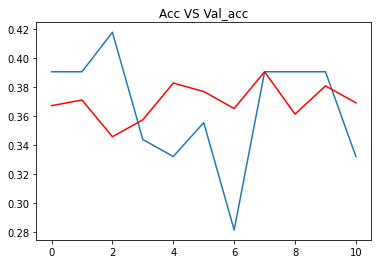

In [100]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")

plt.title("Acc VS Val_acc")
plt.show()

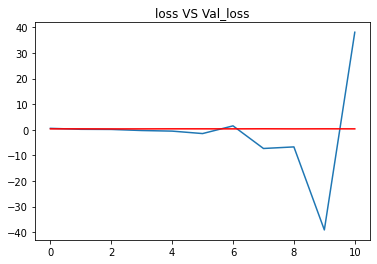

In [101]:
plt.plot(h['loss'])
plt.plot(h['val_accuracy'], c="red")

plt.title("loss VS Val_loss")
plt.show()

loading model

In [102]:

from keras.models import load_model
mdl= load_model("/content/drive/MyDrive/Thesis work/bmodel.h5")

Model accuracy

In [103]:
acc=mdl.evaluate_generator(test_data)[1]
print(f"The accuracy of our model is {acc*100}%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


The accuracy of our model is 37.10910379886627%


In [104]:
def preprocessingImages1(path):
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image= image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode= 'binary')

  return image 

In [105]:
path="/content/drive/MyDrive/thesis_train"
train_data= preprocessingImages1(path)

Found 6772 images belonging to 3 classes.


In [106]:
def preprocessingImages2(path):
  image_data=ImageDataGenerator(preprocessing_function=preprocess_input)
  image= image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode= 'binary')
  return image

In [107]:
path="/content/drive/MyDrive/thesis_test"
test_data= preprocessingImages2(path)

Found 1439 images belonging to 3 classes.


In [108]:
path="/content/drive/MyDrive/thesis_val"
val_data= preprocessingImages2(path)

Found 1439 images belonging to 3 classes.


In [109]:
base_model=MobileNet(input_shape=(224,224,3), include_top=False)

In [110]:
for layer in base_model.layers:
  layer.trainable= False

In [111]:
X=Flatten()(base_model.output)
X=Dense(units=1, activation='sigmoid')(X)

model=Model(base_model.input,X)

In [112]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [113]:
model.compile(optimizer='rmsprop',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [114]:
#call back
from keras.callbacks import ModelCheckpoint, EarlyStopping
#model check point
mc=ModelCheckpoint(filepath="/content/drive/MyDrive/Thesis work/bemodel.h5",monitor='val_accuracy',verbose=1, save_best_only=True)
# Early Stopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=8, verbose=1)
cb=[mc,es]

In [115]:
hist=model.fit_generator(train_data,
                         steps_per_epoch=8,
                         epochs=30,
                         validation_data=val_data,
                         validation_steps=16,
                         callbacks=cb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: -3.7511 - accuracy: 0.3438
Epoch 1: val_accuracy improved from -inf to 0.33203, saving model to /content/drive/MyDrive/Thesis work/bemodel.h5
8/8 [==============================] - 26s 3s/step - loss: -3.7511 - accuracy: 0.3438 - val_loss: -7.4591 - val_accuracy: 0.3320
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: -5.8427 - accuracy: 0.3672
Epoch 2: val_accuracy improved from 0.33203 to 0.37500, saving model to /content/drive/MyDrive/Thesis work/bemodel.h5
8/8 [==============================] - 23s 3s/step - loss: -5.8427 - accuracy: 0.3672 - val_loss: -7.6728 - val_accuracy: 0.3750
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: -16.8658 - accuracy: 0.3320
Epoch 3: val_accuracy improved from 0.37500 to 0.39258, saving model to /content/drive/MyDrive/Thesis work/bemodel.h5
8/8 [==============================] - 24s 3s/step - loss: -16.8658 - accuracy: 0.3320 - val_loss: -20.1868 - v

In [116]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

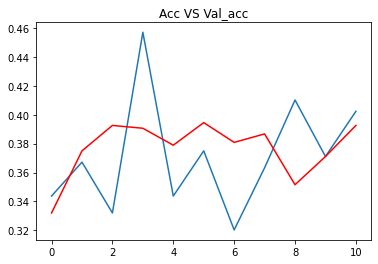

In [117]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")

plt.title("Acc VS Val_acc")
plt.show()

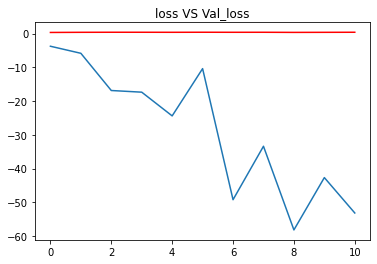

In [118]:
plt.plot(h['loss'])
plt.plot(h['val_accuracy'], c="red")

plt.title("loss VS Val_loss")
plt.show()

In [119]:
model=load_model("/content/drive/MyDrive/Thesis work/bemodel.h5")

In [120]:
acc=model.evaluate_generator(test_data)[1]
print(f"our model accuracy is {acc*100}%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


our model accuracy is 39.541348814964294%


### Grad Cam

In [121]:
model = load_model("/content/drive/MyDrive/Thesis work/bemodel.h5")

In [122]:
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [123]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [124]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))
# last_conv_layer_name = "predictions"

# # Make model
nmodel = model_builder(weights="imagenet")

# Remove last layer's softmax
nmodel.layers[-1].activation = None
nmodel.summary()

# Print what the top predicted class is
preds = model.predict(preprocess_input(get_img_array(img_path, size=(128,128))))
# print("Predicted:", decode_predictions(preds, top=1)[0])
print(preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, nmodel, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

NameError: ignored

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

In [ ]:
img_dir="/content/drive/MyDrive/Thesis work/DataSet/Mini_DDSM/Cancer/1207_C_0187_1.RIGHT_CC.LJPEG.1_highpass.png"
# Print what the top predicted class is
preds = model.predict(preprocess_input(get_img_array(img_dir, size=(128,128))))
print(preds)
print(list(preds[0]))
temp=list(preds[0])
cancerProb=temp[0]
normalProb=temp[1]
if cancerProb>normalProb:
  print("Cancerous !")
else:
  print("Normal")

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(preprocess_input(get_img_array(img_dir, size=(299,299))), nmodel, last_conv_layer_name)
# Display heatmap
plt.matshow(heatmap)
plt.show()
save_and_display_gradcam(img_dir, heatmap)